In [1]:
%cd ../
%config InlineBackend.figure_format='retina'

import logging

import numpy as np
import seaborn as sns
from src.gabor_analysis.gabor_fit import GaborFit
from src.receptive_field.rf import ReceptiveField
from pathlib import Path

logging.getLogger().setLevel(logging.INFO)
sns.set()

/groups/stringer/home/josephs2/janelia2020


In [2]:
path_loader = "data/superstim.hdf5"
path_rf = "data/superstim.hdf5"
path_rf_pcaed = "data/rf_pcaed.npy"

In [3]:
# Parameters
path_npz = "/groups/stringer/home/josephs2/data/text30k_sort_TX56_2020_08_04.npz"
path_loader = "/groups/stringer/home/josephs2/data/text30k_sort_TX56_2020_08_04.hdf5"
path_rf = "/groups/stringer/home/josephs2/data/text30k_sort_TX56_2020_08_04.hdf5"
path_gabor = "/groups/stringer/home/josephs2/data/text30k_sort_TX56_2020_08_04.hdf5"


In [4]:
path_loader = Path(path_loader)
path_rf_pcaed = path_loader.parent / (path_loader.stem + "rf_pcaed.npy")

/groups/stringer/home/josephs2/anaconda3-2020/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
INFO:root:No PCA.


dict_keys(['cls', 'path', 'load_prev_run', 'kwargs'])
<class 'src.receptive_field.rf.ReceptiveField'>
/groups/stringer/home/josephs2/data/text30k_sort_TX56_2020_08_04.hdf5
True
{}


INFO:root:Split 0, step     0. Corr: -0.0525 t:  14.99s
INFO:root:Split 0, step   500. Corr:  0.7151 t:  305.75s
INFO:root:Split 0, step  1000. Corr:  0.7245 t:  588.13s
INFO:root:Split 0, step  1499. Corr:  0.7304 t:  901.24s
INFO:root:Split 1, step     0. Corr: -0.0407 t:  16.56s
INFO:root:Split 1, step   500. Corr:  0.6675 t:  355.46s
INFO:root:Split 1, step  1000. Corr:  0.6757 t:  714.18s
INFO:root:Split 1, step  1499. Corr:  0.6812 t:  1061.71s
INFO:root:Split 2, step     0. Corr: -0.0368 t:   0.79s
INFO:root:Split 2, step   500. Corr:  0.6913 t:  367.14s
INFO:root:Split 2, step  1000. Corr:  0.7005 t:  715.73s
INFO:root:Split 2, step  1499. Corr:  0.7066 t:  1068.07s
INFO:root:Split 3, step     0. Corr: -0.0313 t:   0.84s
INFO:root:Split 3, step   500. Corr:  0.6832 t:  351.80s
INFO:root:Split 3, step  1000. Corr:  0.6914 t:  703.84s
INFO:root:Split 3, step  1499. Corr:  0.6971 t:  1058.38s


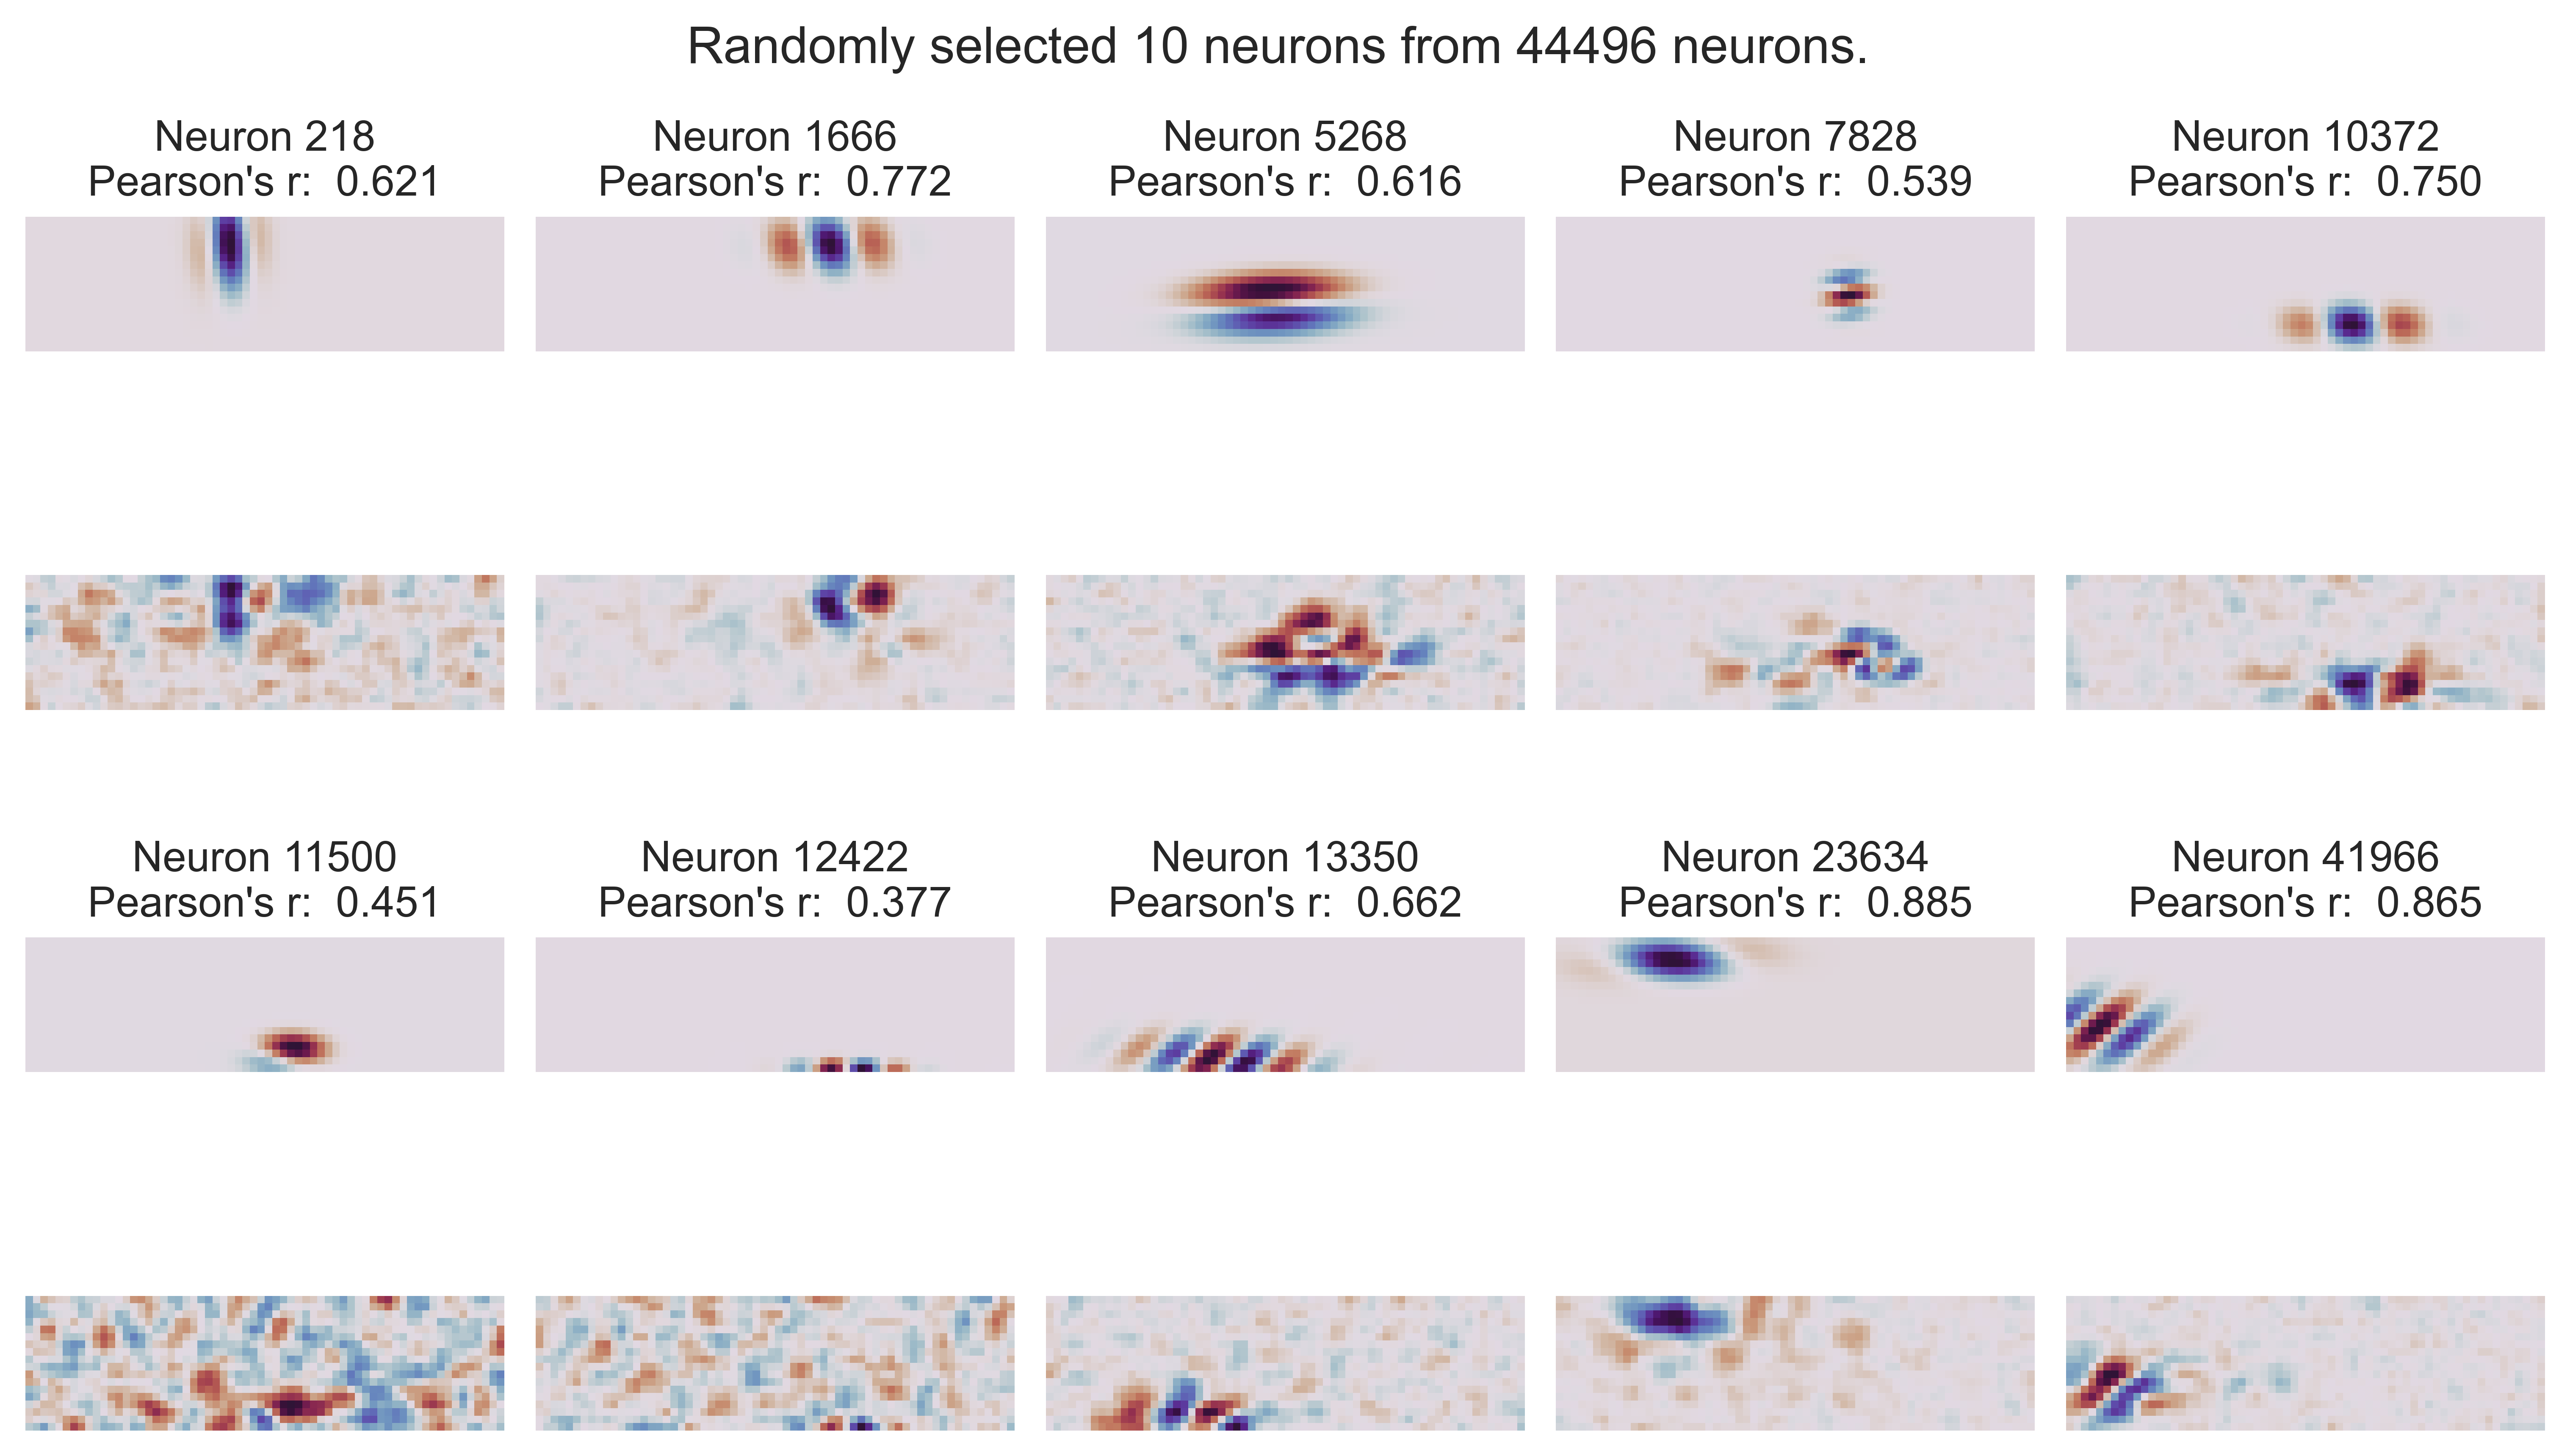

In [5]:
rf_pcaed = np.load(path_rf_pcaed)
rf = ReceptiveField.from_hdf5(path_rf)


def penalties():
    out = np.zeros((5, 2), dtype=np.float32)
    out[GaborFit.KEY["σ"]] = (0.04, 2.0)
    out[GaborFit.KEY["λ"]] = (0.6, 0.85)
    out[GaborFit.KEY["γ"]] = (0.8, 0.5)
    return out


g = GaborFit(
    n_pc=0,
    optimizer={"name": "adam", "step_size": 2e-2},
    params_init={"σ": 2, "θ": 0.0, "λ": 1.0, "γ": 1.5, "φ": 0.0, "pos_x": 0.0, "pos_y": 0.0},
    penalties=penalties(),
).fit(rf_pcaed)
g.plot()
g.save_append(path_loader, overwrite_group=True)

### Diagnostic

As a diagnostic, we check compare
- the correlations between the PCAed RFs and raw RFs and 
- the correlations between the fitted Gabor RFs and raw RFs.

If out Gabor fit can cover enough "receptive field space", there should be a linear correspondence between these two models.

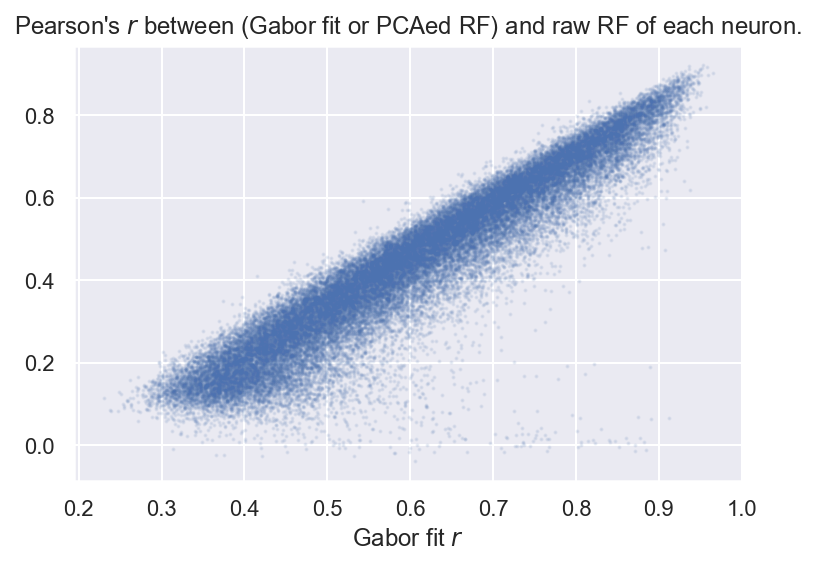

In [6]:
g.plot_corr(rf.rf_, rf_pcaed)